# The Fray is Back? - Daniel K.'s KMeans Algorithm Data Science Portfolio Project

I made this project to show that I could acquire, clean, and analyze text data as a data scientist. I also wanted some experience with an unsupervised Machine Learning technique, having mostly done supervised learning at work to this point. My methods, surely are not above reproach, but I use this project to show that I can run the code and have some understanding of the limitations of this method in the context of the project here. 

I also did this because I am a big "The Fray" fan and was a little miffed at all the nerds in the YouTube comments section who were questioning whether The Fray were "really" back in the absence of Isaac Slade (their old lead singer). So, I set out to assess if they were actually back through a thematic analysis of their song lyrics utilizing an unsupervised machine learning algorithm (Kmeans clustering). 

So, for our purposes the general research question is "Is 'The Fray' back?" Our specific one is "Are 'The Fray's' new songs thematically, or lyrically, similar to their old songs?" 

Our null hypothesis is that they are not back and their songs are thematically distinct from their old songs, which will be confirmed or denied based on where their new songs end up in our clusters. If their new songs are so thematically, or lyrically, different, that they end up in their own cluster by themselves, I will concede to the "nerds" in the YouTube comments that The Fray is not back and a new band is using their name. 

The basic assumption here is that a band engages with similar themes utilizing similar lyrics over the course of their "life" as a band. Though they may wander, we should always be able to tell that the band is "the band." Of course, just looking at lyrics is a bit limiting, there are a lot of variables that make up music and make music similar. But, I'll blame Spotify for banning putting their song data into machine learning algorithms and my lack of desire to write another dissertation for wanting to focus solely on the lyrics. 

Sue me. Now, shall we see if The Fray is actually back?

Importing packages

In [1]:
from bs4 import BeautifulSoup
import requests
import re
from time import sleep
from random import randint
import pandas as pd
import nltk as nltk
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer as wnl
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import seaborn as sns
import spacy
import numpy as np
from scipy.sparse import csr_matrix
import contractions

In [2]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\danie\AppData\Roaming\nltk_data...
[

True

In [3]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [4]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

#### Data Acquisition. 

Data was acquired by scraping AZ Lyrics' website for the Fray's song lyrics. I used the beautiful soup package to get the lyrics and the basic song information from the webpage for the song. So, the next few sections are walking through how I did that, and then I write a 'for loop' to iterate through all of the songs found on the website. I ended up putting everything into a pandas dataframe so I could further clean the lyrics and then move on with the project from there. 

In [6]:
url = 'https://www.azlyrics.com/lyrics/fray/overmyheadcablecar.html'
response = requests.get(url)

In [7]:
soup = BeautifulSoup(response.content, 'html.parser')

<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content='The Fray "Over My Head (Cable Car)": I never knew I never knew that everything was falling through That everyone I knew was waiting on a...' name="description"/>
<meta content="Over My Head (Cable Car) lyrics, The Fray Over My Head (Cable Car) lyrics, The Fray lyrics" name="keywords"/>
<meta content="noarchive" name="robots"/>
<meta content="//www.azlyrics.com/az_logo_tr.png" property="og:image"/>
<title>The Fray - Over My Head (Cable Car) Lyrics | AZLyrics.com</title>
<link href="https://www.azlyrics.com/lyrics/fray/overmyheadcablecar.html" rel="canonical"/>
<link href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.4/css/bootstrap.min.css" rel="stylesheet"/>
<link href="/local/az.css" rel="stylesheet"/>
<!-- HTML5 shim and Respond.js for IE8 support of HTML5 elements and media querie
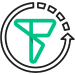
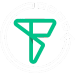

In [8]:
print(soup)

### Getting Artist Name from beautifulsoup object

In [9]:
tag = soup.b.get_text().replace("Lyrics",'')

In [10]:
artist = tag.strip()

In [11]:
print(artist)

The Fray


### How to get a song title using beautiful soup

In [12]:
title = soup.title.get_text()

In [13]:
title3 = title.split("Lyrics")

In [14]:
song_title = title3[0].replace('The Fray - ', '').strip()

In [15]:
print(song_title)

Over My Head (Cable Car)


### How to get the album title and year

In [16]:
#get the album title from the beautiful soup object
test3 = soup.find('div', class_='songinalbum_title').get_text(strip=True)

In [17]:
print(test3)

album:"How To Save A Life"(2005)


In [18]:
test4 = test3.replace('"', '') #remove the quotes from the test string

In [19]:
test4 = test4.replace("album:", '') #remove the word "album:" from the string

In [20]:
test5 = test4.split("(") #split into a tuple using the first parenthesis

In [21]:
album_title = test5[0]
album_year = test5[1].replace(")",'') #save as two variables (album title and album year)

In [22]:
print(album_title, album_year)

How To Save A Life 2005


### Getting the Lyrics from the beautiful soup object

In [23]:
lyrics = soup.select_one(".ringtone ~ div").get_text(strip=True, separator="\n")

### Create Dictionary with Song Title as the Key and the other informaiton as a list

In [24]:
song_information = [artist, album_title, album_year, lyrics]

In [25]:
song_dict = {song_title:song_information}

In [26]:
#print(song_dict)

### Starting to create loops to get the rest of the song lyrics, going to try and get the song list from the fray landing page. 

In [27]:
fray_url = 'https://www.azlyrics.com/f/fray.html'

In [28]:
fray_response = requests.get(fray_url)

In [29]:
fray_all = BeautifulSoup(fray_response.content, 'html.parser')

<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<!-- The above 3 meta tags *must* come first in the head; any other head content must come *after* these tags -->
<meta content='The Fray lyrics - 77 song lyrics sorted by album, including "Known You Always", "Look After You", "Angeleno Moon".' name="description"/>
<meta content="The Fray, The Fray lyrics, discography, albums, songs" name="keywords"/>
<meta content="noarchive" name="robots"/>
<title>The Fray Lyrics</title>
<link href="https://www.azlyrics.com/f/fray.html" rel="canonical"/>
<link href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.4/css/bootstrap.min.css" rel="stylesheet"/>
<link href="/local/az.css" rel="stylesheet"/>
<!-- HTML5 shim and Respond.js for IE8 support of HTML5 elements and media queries -->
<!--[if lt IE 9]>
<script src="https://oss.maxcdn.com/html5shiv/3.7.2/html5shiv.
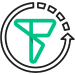
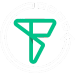

In [30]:
print(fray_all)

In [31]:
#how to save a life div class = 'album' id = 5238
album_test = fray_all.find_all('div', class_='album')#.get_text(strip=True)

In [32]:
print(album_test)

[<div class="album" id="5316">EP: <b>"Reason"</b> (2003)</div>, <div class="album" id="5238">album: <b>"How To Save A Life"</b> (2005)<div><img alt="The Fray - How To Save A Life album cover" class="album-image" src="/images/albums/523/1cdf9fb4eec6127cc8c91fd9513b8bd7.jpg"/></div></div>, <div class="album" id="7206">album: <b>"The Fray"</b> (2009)<div><img alt="The Fray - The Fray album cover" class="album-image" src="/images/albums/720/6903270199b99aa244c9e6552b37c182.jpg"/></div></div>, <div class="album" id="18612">album: <b>"Scars And Stories"</b> (2012)</div>, <div class="album" id="30787">album: <b>"Helios"</b> (2014)<div><img alt="The Fray - Helios album cover" class="album-image" src="/images/albums/307/be266a055e1409755eb5f2f9f1c41a75.jpg"/></div></div>, <div class="album" id="133375">EP: <b>"The Fray Is Back"</b> (2024)<div><img alt="The Fray - The Fray Is Back EP cover" class="album-image" src="/images/albums/133/99f32a18149d630e64d6cc57e616b826.jpg"/></div></div>, <div clas

In [33]:
album_list = []
for item in album_test:
    item2 = item.get_text(strip=True)
    album_list.append(item2)

In [34]:
print(album_list)

['EP:"Reason"(2003)', 'album:"How To Save A Life"(2005)', 'album:"The Fray"(2009)', 'album:"Scars And Stories"(2012)', 'album:"Helios"(2014)', 'EP:"The Fray Is Back"(2024)', 'other songs:']


In [35]:
master_list = fray_all.find_all('div', class_='listalbum-item')

In [36]:
new_master_song_list = []

In [37]:
for item in master_list:
    item2 = item.get_text(strip=True)
    new_master_song_list.append(item2)

In [38]:
print(new_master_song_list)

['Together', 'Some Trust', 'Vienna', 'Without Reason', 'City Hall', 'Oceans', 'Unsaid', 'She Is', 'Over My Head (Cable Car)', 'How To Save A Life', 'All At Once', 'Fall Away', 'Heaven Forbid', 'Look After You', 'Hundred', 'Vienna', 'Dead Wrong', 'Little House', 'Trust Me', 'Syndicate', 'Absolute', 'You Found Me', 'Say When', 'Never Say Never', 'Where The Story Ends', 'Enough For Now', 'Ungodly Hour', 'We Build Then We Break', 'Happiness', 'Heartless(Deluxe Edition Bonus Track)', 'Fair Fight(iTunes Bonus Track)', 'Be The One(Deluxe Edition Bonus Track)', 'Uncertainty(iTunes Bonus Track)', 'Heartbeat', 'The Fighter', 'Turn Me On', 'Run For Your Life', 'The Wind', '1961', 'I Can Barely Say', 'Munich', 'Here We Are', '48 To Go', 'Rainy Zurich', 'Be Still', 'Maps(Pre-Order iTunes Deluxe Edition Bonus Track)', 'Ready Or Not(Pre-Order iTunes Deluxe Edition Bonus Track)', 'Why(Pre-Order iTunes Deluxe Edition Bonus Track)', 'Boulder To Birmingham(Pre-Order iTunes Deluxe Edition Bonus Track)', '

In [39]:
#next step is is to clean this and get rid of the quotes, single quotes, and anything in parenthesis

In [40]:
new_list = []
for item in new_master_song_list:
    if item in new_list:
        None
    elif item == 'Over My Head (Cable Car)': 
        new_list.append(item)
    elif item == 'Happy Xmas (War Is Over)':
        new_list.append(item)
    else:
    #print(item)
        item = re.sub(r'\(.*\)', '', item)
    #print(item)
        new_list.append(item)

In [41]:
print(new_list)

['Together', 'Some Trust', 'Vienna', 'Without Reason', 'City Hall', 'Oceans', 'Unsaid', 'She Is', 'Over My Head (Cable Car)', 'How To Save A Life', 'All At Once', 'Fall Away', 'Heaven Forbid', 'Look After You', 'Hundred', 'Dead Wrong', 'Little House', 'Trust Me', 'Syndicate', 'Absolute', 'You Found Me', 'Say When', 'Never Say Never', 'Where The Story Ends', 'Enough For Now', 'Ungodly Hour', 'We Build Then We Break', 'Happiness', 'Heartless', 'Fair Fight', 'Be The One', 'Uncertainty', 'Heartbeat', 'The Fighter', 'Turn Me On', 'Run For Your Life', 'The Wind', '1961', 'I Can Barely Say', 'Munich', 'Here We Are', '48 To Go', 'Rainy Zurich', 'Be Still', 'Maps', 'Ready Or Not', 'Why', 'Boulder To Birmingham', 'Streets Of Philadelphia', 'Hold My Hand', "Love Don't Die", 'Give It Away', 'Closer To Me', 'Hurricane', 'Keep On Wanting', 'Our Last Days', 'Break Your Plans', 'Wherever This Goes', 'Shadow And A Dancer', 'Same As You', 'Winter Sun', '500,000 Acres', 'Angeleno Moon', 'Same Thing', 'No

In [42]:
print(new_list[50])

Love Don't Die


In [43]:
newest_list = new_list[50:] #made this because someone didn't clean their data well enough and hit an error with the apostrophe in 
#love don't die's title

In [44]:
most_new_list = newest_list[18:]

In [45]:
print(most_new_list)

['Changing Tides', 'Corners', 'Dixie', 'Happy Xmas (War Is Over)', "It's For You", 'Kiss Me', 'Singing Low', 'Where You Want To']


### Create loop to get all of the song lyrics

In [46]:
for song in new_list:
    song = song.lower()
    song = song.replace('(','')
    song = song.replace(')','')
    song = song.replace("'",'')
    song = song.replace(',','')
    song = song.replace(' ','')
    url = 'https://www.azlyrics.com/lyrics/fray/'+song+'.html'
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    #get artist name
    tag = soup.b.get_text().replace("Lyrics",'')
    artist = tag.strip()
    title = soup.title.get_text()
    title3 = title.split("Lyrics")
    song_title = title3[0].replace('The Fray - ', '').strip()
    test3 = soup.find('div', class_='songinalbum_title').get_text(strip=True)
    test4 = test3.replace('"', '')
    test4 = test4.replace('album:', '')
    test5 = test4.split('(')
    album_title = test5[0]
    if len(test5) >=2:
        album_year = test5[1].replace(')','')
    lyrics = soup.select_one(".ringtone ~ div").get_text(strip=True, separator="\n")
    song_information = [artist, album_title, album_year, lyrics]
    song_dict.update({song_title:song_information})
    print(f"I just finished with {song}.")
    sleep(randint(10,30))
    

I just finished with together.
I just finished with sometrust.
I just finished with vienna.
I just finished with withoutreason.
I just finished with cityhall.
I just finished with oceans.


KeyboardInterrupt: 

In [ ]:
print(len(song_dict))

In [ ]:
print(song_dict['Known You Always'])

In [ ]:
song_df = pd.DataFrame.from_dict(song_dict, orient='index')

In [ ]:
song_df.head()

In [ ]:
song_df.rename(columns={'Unnamed: 0':'Song_Title'},inplace=True)

In [ ]:
song_df.head()

In [ ]:
song_df['Album'].value_counts()

I saved the dataframe to a csv after I collected the data so that I would not have to rescrape all of the lyrics everytime I restarted this notebook. 

In [ ]:
song_df.to_csv('TheFraySongs.csv')

In [6]:
song_df = pd.read_csv('TheFraySongs.csv')

In [7]:
song_df.rename(columns={'Unnamed: 0':'Song_Title'},inplace=True)

#### Create Vectorizer for K Means Clustering

##### tokenizing and lemmatizing, then removing stop words

I did a couple of things here, first, I accomplished most of the data cleaning I wanted to in my 'for loop' above. I did find, over the course of my project, that I could have also dropped out brackets and contractions ended up giving me a headache. But, I left the brackets in the songs, as they were not an issue when I tweaked my vectorizer settings later on in the project, and I found a package that made light work of fixing contractions. So, those two headaches were solved. 

I ended up using, what I called, a "simple" version of the song lyrics for this analysis. I decided the lemmatized words were a little too far from the actual song lyrics to do what I wanted and I felt like the "raw" vectorized song lyrics were a little tricky for the algorithm to deal with. Tricky because songs are very repetitive by nature and so some words would be weighted differently based on their frequency in the song's chorus. I decided that I would interpret each song by analyzing the unique lines of the song. So, the song ended up looking more like a poem, with a lot less repetition than a song normally would have because I essentially only counted the chorus once.

My thought process with this was that the "noise" would be reduced, and that, from a thematic perspective, the song would not be deeply changed. But I would allow my algorithm to "hear" the verses a little more clearly. I think the verses are equally important to determining a song's theme to the chorus. 

In [8]:
stopwords = set(stopwords.words('english'))

In [9]:
song_lyrics_list = song_df['Lyrics'].to_list()
song_lyrics_list2 = []
for song in song_lyrics_list:
    new_song = song.replace("\n", ' ')
    song_lyrics_list2.append(new_song)

In [10]:
token_lyrics = []

In [11]:
for song in song_lyrics_list2:
    filtered_lyrics = []
    lyrics = word_tokenize(song.lower())
    for word in lyrics:
        if word not in stopwords:
            filtered_lyrics.append(word)
    token_lyrics.append(filtered_lyrics)

In [12]:
cleaned_tokens = []

In [13]:
for song in token_lyrics:
    cleaned_song = []
    for word in song:    
        pattern = "'.*"
        word = re.sub(pattern, '', word)
        if len(word) >=2:
            cleaned_song.append(word)
    cleaned_tokens.append(cleaned_song)

In [14]:
lemmatized_lyrics = []

In [15]:
for song in cleaned_tokens: 
    lemma_list = []
    for word in song:
        word = word
        lemma_word = wnl().morphy(word) #in case i get a "none" returned, then I can skip putting that word into my final lyrics for analysis
        if lemma_word == None:
            None
        else:
            lemma_list.append(lemma_word)
    lemmatized_lyrics.append(lemma_list)
            

In [16]:
song_df['Token_Lyrics'] = token_lyrics

In [17]:
song_df['Str_Lyrics'] = song_df['Token_Lyrics'].str.join(', ')

In [18]:
song_df['Lemma_Lyrics'] = lemmatized_lyrics

In [19]:
song_df['Lemma_Str_Lyrics'] = song_df['Lemma_Lyrics'].str.join(', ')

In [20]:
test_lyric = song_df[song_df['Song_Title'] == 'The Fighter']['Lyrics'].str.split("\n")

In [21]:
print(test_lyric)

33    [The lover held her love, She begged him not t...
Name: Lyrics, dtype: object


In [23]:
test_lyric_list = []

In [24]:
for song in song_lyrics_list:
    new_song = song.split("\n")
    test_lyric_list.append(new_song)

In [25]:
test_clean_list = []

In [26]:
for song in test_lyric_list:
    intermediate_list = []
    for line in song:
        if line not in intermediate_list:
            intermediate_list.append(line)
        if line in intermediate_list:
            None
    test_clean_list.append(intermediate_list)

In [33]:
new_song_clean = []

In [34]:
for song in test_clean_list:
    intermediate_2 = []
    for word in song: 
        new_word = contractions.fix(word)
        intermediate_2.append(new_word)
    new_song_clean.append(intermediate_2)

In [35]:
print(new_song_clean[2])

['So you fake you are full and you feel tomorrow', 'Coming and you got to do what you can do to get', 'Away with everything you want and still get what you need', 'So you are slowing down because you have done it before', 'You look at the floor and you wonder when it is going to', 'Come on up over your head so you can get some rest', 'Some trust in love and some trust in hatred', 'Some trust in fear and some in violence', 'Some trust in faith and some trust in fortune', 'Some trust in God and some just get away', 'Swear to God I am going to get it right', 'Stay down tied until I get my fill', 'I take it all but it is falling through', 'Done it before so maybe a little bit', 'More will make it easier to get on through the door', 'Some trust in pain and some trust in pleasure', 'Some trust in union, some in innocence', 'Some trust in fear and some trust in fortune', 'Some trust everyone and some just get away', 'Call it security', 'Call it your purity', 'Call it the words we pray', 'Call

In [36]:
song_df['Simple_Lyrics'] = new_song_clean

In [37]:
song_df['Simple_Lyrics_Str'] = song_df['Simple_Lyrics'].str.join(', ')

In [38]:
#next cleaning step is to ditch contractions and some slang - and then run forward with the clusters...

In [39]:
print(song_df['Simple_Lyrics_Str'])

0     I never knew, I never knew that everything was...
1     As the spring in its bloom, The summer stars a...
2     So you fake you are full and you feel tomorrow...
3     The day's last one-way ticket train pulls in, ...
4     I do it on a whim, It is rhyme without reason,...
                            ...                        
71    So this is Christmas, And what have you done, ...
72    When the winds come and they blow, When the ra...
73    Kiss me, out of the bearded barley, Nightly, b...
74    Words are fallin' on our skin, Like water tort...
75    You move my mind to you, My thoughts distracte...
Name: Simple_Lyrics_Str, Length: 76, dtype: object


In [40]:
song_len_unique_lyrics_list = []

In [41]:
for song in test_clean_list:
    len_song = len(song)
    song_len_unique_lyrics_list.append(len_song)

In [42]:
print(song_len_unique_lyrics_list)

[32, 12, 29, 19, 18, 26, 16, 20, 19, 29, 19, 17, 13, 21, 16, 21, 19, 23, 20, 17, 41, 40, 17, 26, 23, 14, 11, 26, 41, 11, 17, 15, 26, 32, 22, 26, 23, 30, 27, 20, 16, 26, 29, 17, 15, 43, 44, 23, 19, 29, 22, 26, 21, 19, 23, 13, 17, 22, 16, 20, 37, 33, 32, 17, 16, 28, 21, 20, 25, 32, 16, 25, 16, 18, 26, 12]


In [43]:
song_df['Len_Simple_Lyrics'] = song_len_unique_lyrics_list

#### Thematic Analysis (LDA with sklearn)

In [44]:
count_vector = CountVectorizer(stop_words='english')

In [45]:
thematic_lyrics = song_df['Lyrics']

In [46]:
thematic_lyrics_vector = count_vector.fit_transform(thematic_lyrics)

In [47]:
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(thematic_lyrics_vector)

LatentDirichletAllocation(n_components=5, random_state=42)

In [48]:
test = lda.get_feature_names_out()

In [49]:
test2 = lda.components_

#### Sentiment Analysis on Full song lyrics, on token lyrics and on lemma lyrics

In [50]:
sentiment_finder = SentimentIntensityAnalyzer()

In [51]:
def sentiment(text):
    scores = sentiment_finder.polarity_scores(text)
    sentiment = scores['compound'] #if you want to see all of the scores, just remove the compound part
    return sentiment

In [52]:
song_df['Lyrics_Sent'] = song_df['Lyrics'].apply(sentiment)

In [53]:
song_df['Token_Sent'] = song_df['Str_Lyrics'].apply(sentiment)

In [54]:
song_df['Lemma_Sent'] = song_df['Lemma_Str_Lyrics'].apply(sentiment)

In [55]:
song_df['Simple_Lyrics_Sent'] = song_df['Simple_Lyrics_Str'].apply(sentiment)

[]

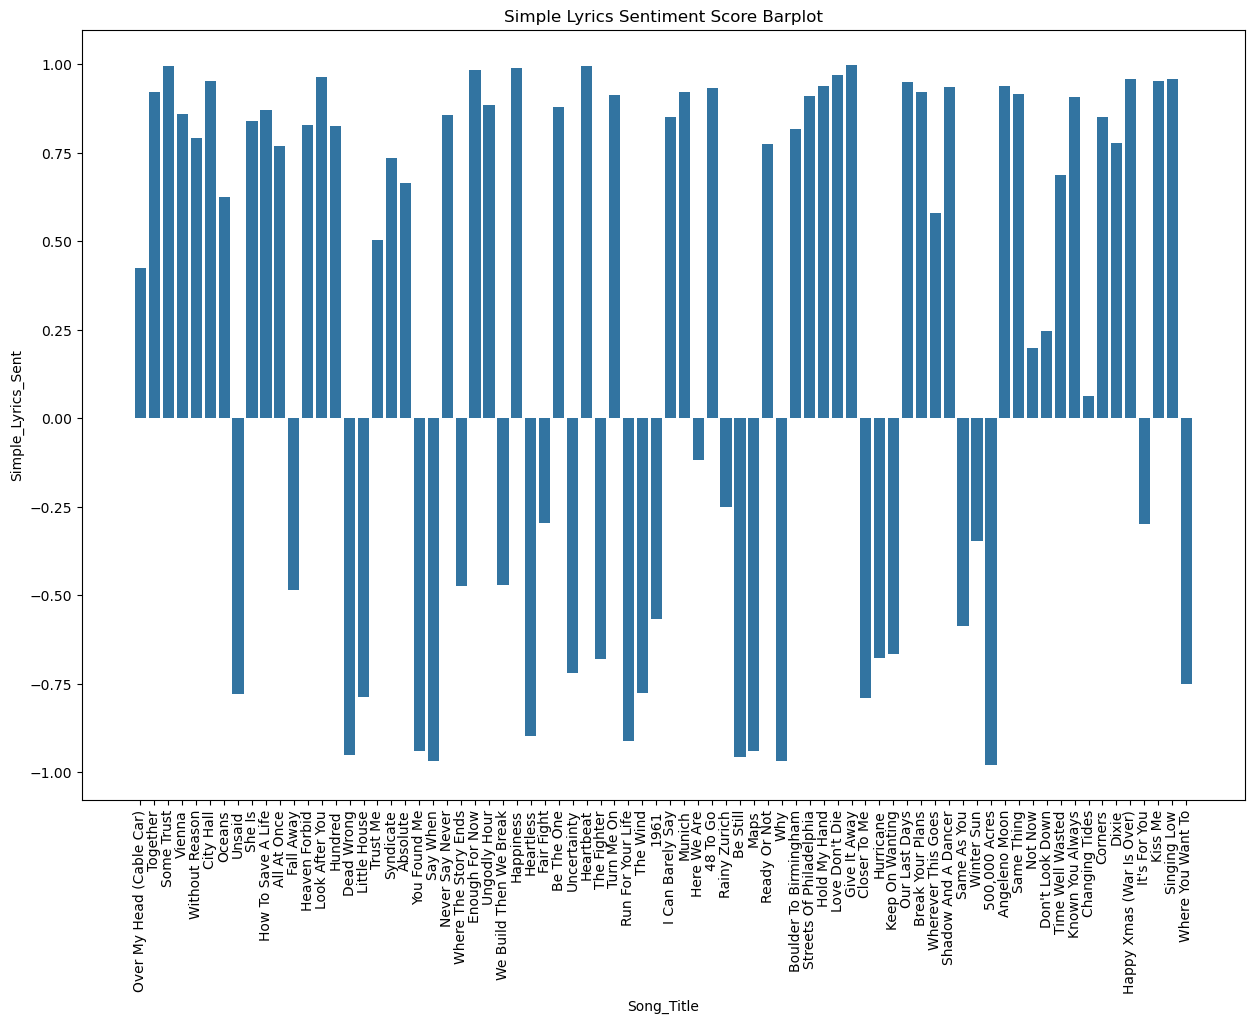

In [231]:
plt.figure(figsize=(15,10))
plt.title('Simple Lyrics Sentiment Score Barplot')
plt.xticks(rotation=90)
sns.barplot(data=song_df, x='Song_Title', y='Simple_Lyrics_Sent')
plt.plot()

I made a barplot of the sentiment scores of each song. I went with the "simple lyrics" here because, when I did this with the lemmatized lyrics, it said that "Over My Head" was a happy song. That was not a statement I could endorse, so I didn't endorse it. I felt the simple lyrics gave me a slightly better snapshot of the songs - but obviously, this is just tallying up the score based on values assigned to words, so its all a bit arbitrary. 

#### Making Different Clusters based on the number of pre-processing steps I did

This section is a bit messy and is messy because I was figuring out the best way to run the clusters. But, I ended up settling on the vectorizer settings you see below. But, I tried vectorizing the various types of lyrics I made with my cleaning steps without the parameters seen below first. I just used the defaults of 0 and 0 for max_df and min_df. But, I eventually used these settings because I needed to reduce the noise in the dataset and these were good starting places. Of course, more optimization could be done by tweaking these settings. 

This section also shows me pulling out top words from each song and making different kmeans models with the various lyrics I made. 

In [57]:
vectorizer = TfidfVectorizer(max_df = .5, min_df = 5, stop_words='english') #play with these settings, see if you can clean up noise with them...

In [58]:
text = vectorizer.fit_transform(song_df['Lyrics'].values.astype(str)) #first attempt at kmeans

In [59]:
text_3 = vectorizer.fit_transform(song_df['Str_Lyrics'].values.astype(str)) #second attempt at kmeans

In [60]:
text_4 = vectorizer.fit_transform(song_df['Lemma_Str_Lyrics'].values.astype(str))

In [61]:
text_5 = vectorizer.fit_transform(song_df['Simple_Lyrics_Str'].values.astype(str))

In [62]:
test = text_5.toarray()

In [63]:
print(vectorizer.vocabulary_)

{'knew': 60, 'falling': 31, 'waiting': 126, 'turn': 124, 'run': 94, 'got': 45, 'coming': 22, 'way': 133, 'stay': 105, 'standing': 103, 'head': 50, 'left': 64, 'mind': 82, 'let': 65, 'just': 57, 'say': 96, 'change': 15, 'friend': 38, 'lose': 74, 'comes': 21, 'ground': 46, 'thought': 115, 'wanted': 130, 'bring': 10, 'til': 116, 'come': 20, 'love': 76, 'day': 24, 'days': 25, 'feel': 34, 'away': 1, 'want': 129, 'need': 83, 'look': 73, 'floor': 36, 'wonder': 135, 'going': 42, 'fear': 33, 'god': 40, 'swear': 109, 'right': 92, 'maybe': 79, 'little': 70, 'make': 78, 'door': 28, 'words': 136, 'goes': 41, 'gone': 43, 'long': 71, 'meet': 80, 'thing': 112, 'face': 29, 'reason': 90, 'time': 117, 'life': 66, 'line': 69, 'talk': 110, 'city': 16, 'night': 85, 'today': 118, 'fight': 35, 'inside': 55, 'like': 68, 'far': 32, 'lay': 61, 'did': 26, 'kiss': 58, 'sun': 108, 'fall': 30, 'waves': 132, 'begin': 3, 'leave': 62, 'tonight': 120, 'leaving': 63, 'things': 113, 'instead': 56, 'breathing': 9, 'tell': 

In [64]:
top_n = 10
top_indices = test.argsort(axis=1)[:, -top_n:]

In [65]:
top_tfidf_array = np.zeros_like(test)
for i, indices in enumerate(top_indices):
    top_tfidf_array[i, indices] = test[i, indices]

In [66]:
words_df = pd.DataFrame(top_tfidf_array)

In [67]:
words_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Columns: 141 entries, 0 to 140
dtypes: float64(141)
memory usage: 83.8 KB


In [68]:
top_tfidf_matrix = csr_matrix(top_tfidf_array)

In [69]:
top_tfidf_df = pd.DataFrame(top_tfidf_matrix.toarray(), columns = vectorizer.get_feature_names_out())

In [70]:
top_tfidf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Columns: 141 entries, alright to years
dtypes: float64(141)
memory usage: 83.8 KB


In [71]:
test_row = top_tfidf_df.loc[75]
non_zero_columns = test_row.index

In [72]:
top_new = top_tfidf_df.loc[:, (top_tfidf_df != 0).any(axis=0)]

In [73]:
test_row_new = top_new.loc[75]
non_zero_col_new = test_row_new.index

In [74]:
top_new2 = pd.merge(top_new, song_df[['Len_Simple_Lyrics', 'Simple_Lyrics_Sent']], how='left', left_index=True, right_index=True)

In [75]:
scaler = MinMaxScaler()

In [76]:
scaler.fit(top_new)

MinMaxScaler()

In [77]:
standard_top_new = scaler.transform(top_new)

In [78]:
for value in test[0]:
    if value > .24:
        print(value, vectorizer.get_feature_names_out())

0.27180437901402316 ['alright' 'away' 'baby' 'begin' 'begins' 'best' 'better' 'body' 'break'
 'breathing' 'bring' 'broken' 'burning' 'came' 'carry' 'change' 'city'
 'close' 'closer' 'cold' 'come' 'comes' 'coming' 'darling' 'day' 'days'
 'did' 'different' 'door' 'face' 'fall' 'falling' 'far' 'fear' 'feel'
 'fight' 'floor' 'forget' 'friend' 'friends' 'god' 'goes' 'going' 'gone'
 'good' 'got' 'ground' 'hand' 'hands' 'hard' 'head' 'hear' 'heart' 'hold'
 'home' 'inside' 'instead' 'just' 'kiss' 'knees' 'knew' 'lay' 'leave'
 'leaving' 'left' 'let' 'life' 'light' 'like' 'line' 'little' 'long'
 'longer' 'look' 'lose' 'lost' 'love' 'lovers' 'make' 'maybe' 'meet'
 'miles' 'mind' 'need' 'new' 'night' 'oh' 'old' 'place' 'rain' 'reason'
 'remember' 'right' 'road' 'run' 'said' 'say' 'skin' 'sky' 'slow' 'slowly'
 'soul' 'stand' 'standing' 'start' 'stay' 'stop' 'story' 'sun' 'swear'
 'talk' 'tell' 'thing' 'things' 'think' 'thought' 'til' 'time' 'today'
 'told' 'tonight' 'touch' 'try' 'trying' 'turn' 'w

In [79]:
test_dict_2 = dict(zip(vectorizer.get_feature_names_out(), test[0]))

In [80]:
test2 = pd.DataFrame(test, columns = vectorizer.get_feature_names_out())

In [81]:
kmeans = KMeans(n_clusters=7, random_state=42).fit(text) #unfiltered lyrics

In [82]:
kmeans_labels = (kmeans.labels_)

In [83]:
kmeans2 = KMeans(n_clusters=10, random_state=42).fit(text_3)

In [84]:
kmeans2_labels = kmeans2.labels_

In [85]:
kmeans3 = KMeans(n_clusters=7, random_state=42).fit(text_4)

In [86]:
kmeans3_labels = kmeans3.labels_

In [87]:
kmeans4 = KMeans(n_clusters=7, random_state=42).fit(text_5)

In [88]:
kmeans4_labels = kmeans4.labels_

In [89]:
kmeans5 = KMeans(n_clusters=7, random_state=42).fit(song_df[['Len_Simple_Lyrics', 'Simple_Lyrics_Sent']])

C:\Users\danie\anaconda3\envs\home_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [90]:
kmeans5_labels = kmeans5.labels_

In [91]:
kmeans6 = KMeans(n_clusters=7, random_state=42).fit(top_tfidf_matrix)

In [92]:
kmeans6_labels = kmeans6.labels_

In [93]:
kmeans7 = KMeans(n_clusters=7, random_state=42).fit(top_new2)

C:\Users\danie\anaconda3\envs\home_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [94]:
kmeans7_labels = kmeans7.labels_

In [95]:
kmeans8 = KMeans(n_clusters=7, random_state=42).fit(standard_top_new)

C:\Users\danie\anaconda3\envs\home_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [96]:
kmeans8_labels = kmeans8.labels_

In [97]:
kmeans9 = KMeans(n_clusters=7, random_state=42).fit(top_new)

C:\Users\danie\anaconda3\envs\home_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [98]:
kmeans9_labels = kmeans9.labels_

In [99]:
song_df['Cluster_Num'] = kmeans_labels #adding the labels to the dataframe with our data in it

In [100]:
song_df['KMeans_Labels3'] = kmeans3_labels

In [101]:
song_df['KMeans_Labels2'] = kmeans2_labels

In [102]:
song_df['KMeans_Labels4'] = kmeans4_labels

In [103]:
song_df['KMeans_Labels5'] = kmeans5.labels_

In [104]:
song_df['KMeans_Labels6'] = kmeans6_labels

In [105]:
song_df['KMeans_Labels7'] = kmeans7_labels

In [106]:
song_df['KMeans_Labels8'] = kmeans8_labels

In [107]:
song_df['KMeans_Labels9'] = kmeans9_labels

### Evaluating how many clusters by using a silhouette score and the elbow method. 

In [108]:
silhouette_score2 = silhouette_score(top_tfidf_matrix, kmeans.labels_) #string lyrics as input for silhouette score

In [109]:
print(silhouette_score2)

-0.005947331884222767


In [110]:
silhouette_scores2 = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(top_new2)
    silhouette_avg = silhouette_score(top_new2, kmeans.labels_)
    silhouette_scores2.append(silhouette_avg)
    print(silhouette_avg)

0.5665801389535342
0.5647997308090891
0.4814785881538769
0.40418056984329065
0.38569757310204433
0.4195767339866916
0.3248818853171935
0.3558693267663115
0.32874837028589166


C:\Users\danie\anaconda3\envs\home_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\danie\anaconda3\envs\home_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\danie\anaconda3\envs\home_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\danie\anaconda3\envs\home_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: User

In [111]:
optimal_clusters = silhouette_scores2.index(max(silhouette_scores2)) + 2 #2 b/c range is 2-11
print("Optimal number of clusters:", optimal_clusters)

Optimal number of clusters: 2


So, doing the elbow on just the vectorized "top words" would have suggested we use 4 clusters as opposed to 7. Again, I wanted to use 7 just because I knew that we had 7 lables, but in reality, we wouldn't "have" to have 7 labels. Theoretically, a band could use very similar lyrics across 7 albums, which would result in fewer clusters, or maybe they experiment a lot with their lyrics and would have more than 7. 

In [112]:
inertia2 = [] #elbow method on the string text data
k_ranges = range(1,12)
for k in k_ranges:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(top_new2)
    inertia2.append(kmeans.inertia_)

C:\Users\danie\anaconda3\envs\home_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\danie\anaconda3\envs\home_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\danie\anaconda3\envs\home_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\danie\anaconda3\envs\home_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: User

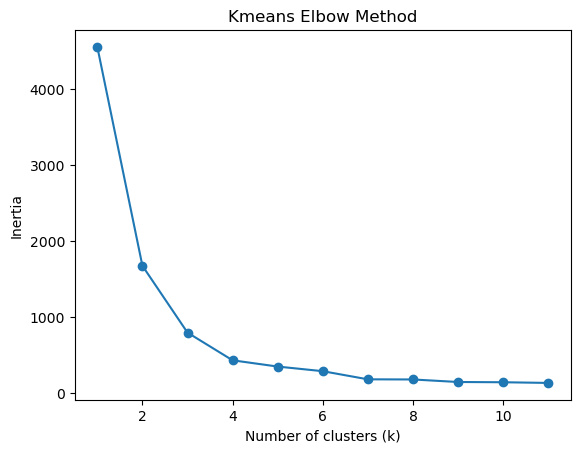

In [113]:
plt.plot(k_ranges, inertia2, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Kmeans Elbow Method')
plt.show()

In [114]:
inertia = []
k_range = range(1,40)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(text)
    inertia.append(kmeans.inertia_)

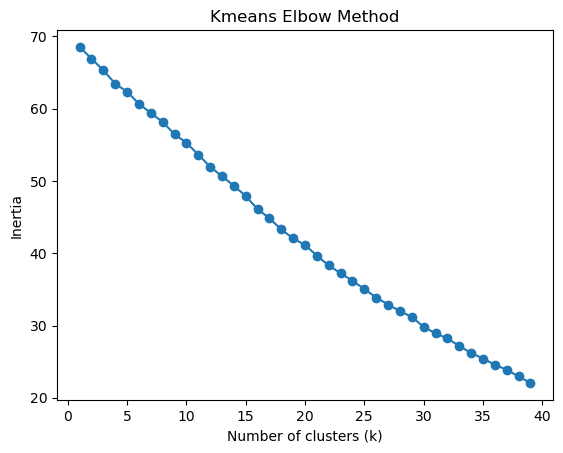

In [115]:
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Kmeans Elbow Method')
plt.show()

#### Clustering and the TSNE Plots of the Different Clusters

This section of the notebook looks at my struggles with making coherent clusters. There are three main efforts here - 
1) starting to figure things out by just doing clusters on the lyrics without really playing with the settings in the vectorizer or doing any dimensionality reduction.
2) trying to create some other quantitative variables to use to help give the clusters something a little more to hang on to, so to speak. I ended up abandoning this when I figured out that I was just clustering off of the bigger quantitative variables and that Spotify didn't want you putting their song data into machine learning models.
3) is the final method, and pictured below in a different section. But, this is what I ended up doing after following SKlearn's coding example for kmeans clustering on text data. I reduced the dimensionality of the data and restricted the words the vectorizer actually vectorized. 

#### Attempt 1 - Just going for it

In [116]:
tsne2 = TSNE(n_components=3, random_state=42) #tsne of the lemmatized lyrics that were vectorized
text_tsne2 = tsne2.fit_transform(text_4.toarray())

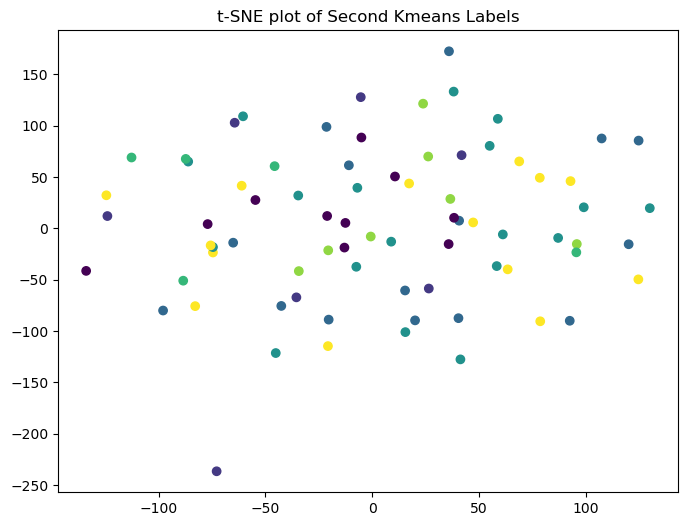

In [117]:
plt.figure(figsize=(8,6))
plt.scatter(text_tsne2[:, 0], text_tsne2[:,1], c=kmeans3_labels, cmap='viridis', marker='o')
plt.title('t-SNE plot of Second Kmeans Labels')
plt.show()

#### Attempt 2 - Trying to use some other quanitative variables. 

In this example I just used the quantitative variables by themselves, but I did have a version of this where I used the vectorized words as well, but the clusters looked similar. 

In [122]:
sent_score = song_df[['Len_Simple_Lyrics','Simple_Lyrics_Sent']]

In [123]:
tsne4 = TSNE(n_components=2, random_state = 42)
text_tsne4 = tsne4.fit_transform(sent_score)

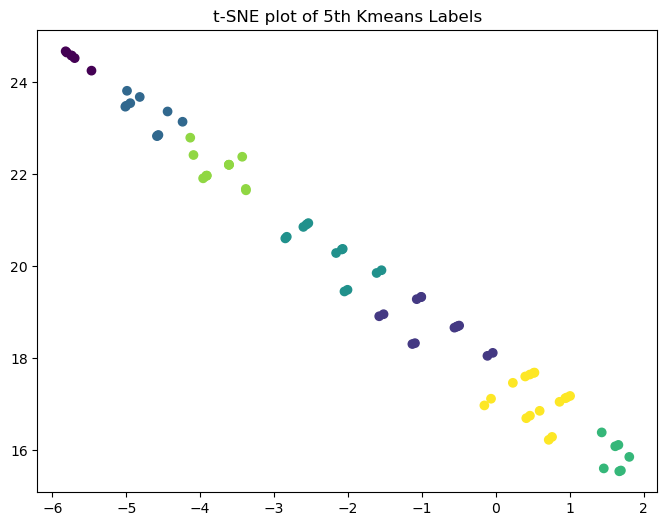

In [124]:
plt.figure(figsize=(8,6))
plt.scatter(text_tsne4[:, 0], text_tsne4[:,1], c=kmeans5_labels, cmap='viridis', marker='o')
plt.title('t-SNE plot of 5th Kmeans Labels')
plt.show()

#### Seeing the Important Words to Each Song - According to the Vectorized Song Lyrics

In [140]:
top_new2['Cluster_Outputs'] = song_df['KMeans_Labels7']

In [141]:
cluster_values_list = top_new.index.values.tolist()

In [143]:
top_words_list = []

In [144]:
for index in cluster_values_list:
    song_df1 = top_new.loc[index]
    song_df2 = song_df1[song_df1 != 0].index.values.tolist()
    song_df2 = song_df2[0:9]
    top_words_list.append(song_df2)
    print(song_df['Song_Title'].loc[index], index, song_df2)

Over My Head (Cable Car) 0 ['bring', 'ground', 'head', 'just', 'knew', 'let', 'lose', 'mind', 'run']
Together 1 ['come', 'day', 'days', 'love']
Some Trust 2 ['away', 'door', 'fear', 'god', 'going', 'just', 'little', 'love', 'swear']
Vienna 3 ['day', 'face', 'friend', 'goes', 'gone', 'long', 'maybe', 'meet', 'way']
Without Reason 4 ['comes', 'feel', 'life', 'line', 'mind', 'reason', 'run', 'talk', 'time']
City Hall 5 ['city', 'fight', 'inside', 'like', 'make', 'mind', 'night', 'say', 'today']
Oceans 6 ['away', 'begin', 'gone', 'ground', 'leave', 'make', 'today', 'waves', 'way']
Unsaid 7 ['breathing', 'hard', 'instead', 'leaving', 'rain', 'say', 'talk', 'things', 'today']
She Is 8 ['bring', 'close', 'going', 'instead', 'knees', 'knew', 'place', 'stand', 'walking']
How To Save A Life 9 ['begin', 'best', 'came', 'god', 'life', 'right', 'say', 'talk', 'wonder']
All At Once 10 ['begin', 'begins', 'better', 'longer', 'maybe', 'need', 'right', 'thing', 'want']
Fall Away 11 ['away', 'face', 'fa

In [145]:
song_df['Top_Lyrics_Per_Song'] = top_words_list

### Attempt 3 - Testing SKLearn documentation

I got the code below from an example from SKLearn's documentation on how to do "Latent Thematic Analysis" on text by using a combination of dimensionality reduction and vectorization. So, I did not come up with this code, but I had to make a couple of small tweaks to get it to run here. I also did not rely heavily on this for decision making, though I did think learning about what percentage of the variance was explained by the SVD factors was interesting. 

I also looked at the elbow method to see how many clusters that would suggest I use for the project. You could also look at silhouette scores for the data, which I did not do for this project but is another way to determine the number of clusters you should optimally use for your data.

In [147]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

In [148]:
lsa = make_pipeline(TruncatedSVD(n_components=7), Normalizer(copy=False))
#lsa = TruncatedSVD(n_components=7, n_iter=7, random_state=42)
X_lsa = lsa.fit_transform(top_tfidf_matrix)
explained_variance = lsa[0].explained_variance_ratio_.sum()

print(f"Explained variance of the SVD step: {explained_variance * 100:.1f}%")

Explained variance of the SVD step: 22.8%


In [149]:
kmeans = KMeans(
    n_clusters=7,
    max_iter=100,
    n_init=1,
    random_state=42
)

fit_and_evaluate(kmeans, X_lsa, name="KMeans\nwith LSA on tf-idf vectors")

clustering done in 0.00 ± 0.00 s 
Silhouette Coefficient: 0.241 ± 0.017


C:\Users\danie\anaconda3\envs\home_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\danie\anaconda3\envs\home_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\danie\anaconda3\envs\home_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\danie\anaconda3\envs\home_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: User

In [206]:
kmeans_newest = KMeans(n_clusters = 7, max_iter=100, n_init=1, random_state=42).fit(X_lsa)

C:\Users\danie\anaconda3\envs\home_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [207]:
kmeans_newest_labels = kmeans_newest.labels_

In [216]:
inertia3 = [] #elbow method on the string text data
k_ranges = range(1,12)
for k in k_ranges:
    kmeans = KMeans(n_clusters=k, max_iter=100, n_init=1, random_state=42)
    kmeans.fit(X_lsa)
    inertia3.append(kmeans.inertia_)

C:\Users\danie\anaconda3\envs\home_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\danie\anaconda3\envs\home_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\danie\anaconda3\envs\home_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\danie\anaconda3\envs\home_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: User

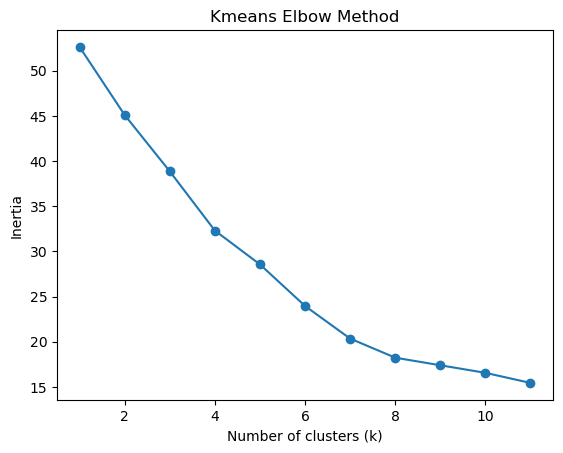

In [217]:
plt.plot(k_ranges, inertia3, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Kmeans Elbow Method')
plt.show()

I'm going to stick with seven clusters because there are seven groupings of albums from AZ Lyrics. However, eight might also work, as that seems to be the bottom of the elbow. 

In [218]:
song_df['Newest_Labels'] = kmeans_newest_labels

In [219]:
for item in range(0,7):
    print(song_df[song_df['Newest_Labels'] == item][['Song_Title','Album']])

                  Song_Title                Album
0   Over My Head (Cable Car)   How To Save A Life
15                Dead Wrong   How To Save A Life
25              Ungodly Hour             The Fray
28                 Heartless             The Fray
43                  Be Still    Scars And Stories
57        Wherever This Goes               Helios
61             500,000 Acres               Helios
62             Angeleno Moon  EP:The Fray Is Back
65           Don't Look Down  EP:The Fray Is Back
66          Time Well Wasted  EP:The Fray Is Back
67          Known You Always  EP:The Fray Is Back
71  Happy Xmas (War Is Over)    You May Also Like
             Song_Title               Album
1              Together           EP:Reason
13       Look After You  How To Save A Life
32            Heartbeat   Scars And Stories
34           Turn Me On   Scars And Stories
45         Ready Or Not   Scars And Stories
58  Shadow And A Dancer              Helios
69              Corners   You May Also Lik

#### Setting up the visualization for the latest clusters

In [210]:
legend = [0,1,2,3,4,5,6]

In [211]:
tsne10 = TSNE(n_components=2, random_state = 42)
text_tsne10 = tsne10.fit_transform(X_lsa)

In [192]:
tsne10_df = pd.DataFrame(text_tsne10)

In [194]:
tsne10_df['KMeans_newest_labels'] = kmeans_newest_labels #0 = x, 1 = y

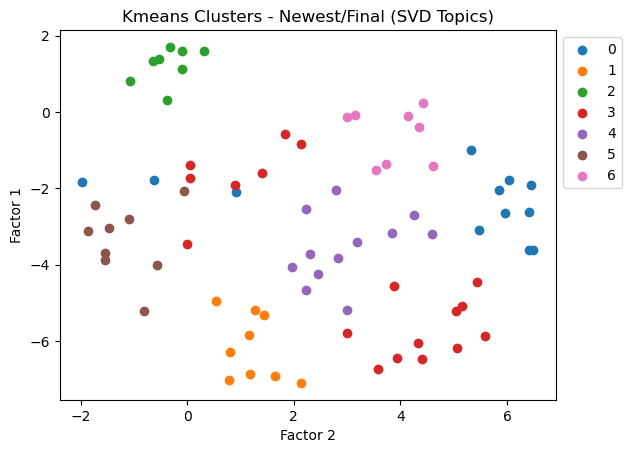

In [230]:
for number in legend:
    plt.scatter(tsne10_df[tsne10_df['KMeans_newest_labels']==number][0], tsne10_df[tsne10_df['KMeans_newest_labels']==number][1], label=number)
plt.legend(bbox_to_anchor = (1, 1))
plt.title('Kmeans Clusters - Newest/Final (SVD Topics)')
plt.ylabel('Factor 1')
plt.xlabel('Factor 2')
plt.show()

#### Seeing what words the clusters centered on

In [158]:
original_space_centroids = lsa[0].inverse_transform(kmeans_newest.cluster_centers_)
order_centroids = original_space_centroids.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

for i in range(7):
    print(f"Cluster {i}: ", end="")
    for ind in order_centroids[i, :10]:
        print(f"{terms[ind]} ", end="")
    print()

Cluster 0: way new wrong best stop just let time thought lose 
Cluster 1: oh love lay way going away say want like come 
Cluster 2: maybe place goes thing say gone way need stop home 
Cluster 3: want time run tell need life hear way reason face 
Cluster 4: away going come love home bring fall lay hand just 
Cluster 5: say love right wait hard leaving best things wrong today 
Cluster 6: years left broken kiss things little wait alright told did 


### Qualitative Assessment of the Clusters

Cluster 0 – Turmoil in Relationships
- important words: way, new, wrong, best, stop, just, let, time, thought, lose
- Notable Songs: Over My Head, Dead Wrong, Be Still, Angeleno Moon, Don’t Look Down, Time Well Wasted, Known You Alway
- Total Song Count: 12

This cluster is about close relationships and their turmoil, being present in those relationships, and carrying the people you love in your heart (whether they are alive or not). And, again, if we re-run these clusters its likely these songs would fall in slightly different places, but the ghink I like about this particular grouping is that four of the new songs from The Fray is Back EP are in this cluster and so is one of their most notable songs, Over My Head.  

I believe that Slade has discussed Over My Head’s meaning in interviews, but we will borrow from MusicBanter’s analysis, and highlight the fact that the song is written from Slade’s brother’s perspective and about Slade’s brother leaving the band. 

So, isn’t it poetic, then, that the Fray’s first song from their new EP is Time Well Wasted. A song, tat is, in my opinion, about Slade himself leaving the band. From the chorus, “Never thought we’d get lost, Never thought we’d get broken… Even though we couldn’t save it, it was time well wasted.” This is a song about people dreaming “big dreams” together, going on an adventure, and then going separate
ways.

 
“And suddenly I become part of your past, I’m becoming the part that don’t last, I’m losing you, and it’s effortless”. Sound familiar? People who are close to on another who part ways.  While Time Well Wasted has more positive unertonese, both songs are talking about being close to someone and going separate ways. Be Still and Don’t Look Down are more positive takes on close relationships, where we are encouraged to be close with someone and trust them. Angeleno Moon, Known You Always, and Ungodly Hour strike me as songs where our singer is dealing with loss of a close relationship of some kind.


Of course, this cluster is not great, we have three stragglers hanging out closer to clusters 5 and 3, but the overall theme is evidenced by these songs generally dealing with close personal relationships and the different emotions that they bring u. sConsequently, this cluster highlights The Fray really returning to their roots in their newest EP with four of their new songs (Time Well Wasted, Known You Always, Angeleno Moon, and Don't Look Down) striking a similar chord as one of their biggest htsi.

### Conclusion

The Fray are back. 

Thankfully. I missed them a lot. 

The following sections offer some explanations for the other clusters, but I think we have enough data to settle the debate and answer the research question I laid out at the beginning of this piece. Thanks for reading!

#### Additional Clusters

As a last methodological note, I will highlight that this kind of analysis is a bit tricky because the words that are determining a song's inclusion in a cluster are not necessarily functioning in the same way, thematically, between each song. For example, "Love" could be equally important in several songs, but could be used in one song to communicate how much someone loves their significant other and the joy that comes along with that. While, on the other hand, "Love" could be used to convey the extreme pain felt by someone after losing a loved one, where you need to know how much love there is for this person to understand the survivor's pain at having lost them.

#### Cluster 1 - Unconditional Love
 - Important Words: oh, love, lay, way, going, away, say, like, come
 - Notable Songs: Heartbeat, Look After You, Cornerns, Singing Low
 - Total Song Count: 9

I’ll center this analysis on my favorite song in this grouping, Corners. This song was one of the last new songs we received from the Fray before their hiatus, and it is one of my favorite songs by them. Love and lay are the key words from our list that appear to be heavy hitters in this song. I would argue that this song is about unconditional love. Where, in our last cluster we had the specter of loss haunting our close relationships, this grouping is more about loving through life – no matter what that looks like. “It doesn’t matter what we said, I’ll never stop loving you back.” 

Heartbeat hits a similar note singing - “love someone, love them all the same… I want to kiss your scars tonight”. Look After You’s chorus is a refrain for caring about someone, and tells us that when the singer loses control, their baby is the “only one who knows” who “slow[s] it down”. That last line makes me think of the people in our lives who know how to push our buttons, and in this case, the button is the “pressure release” valve that helps us calm down from a panic. Together follows lovers “becoming one” and spending everyday together. 

I think Shadow and a Dancer, similarly, talks about being inseparable from your partner, or lover. Shadows and their Dancers are in lock-step all the time. The imagery invoked by the Pacific Ocean and Cascade Mountains also conjures up thoughts of permanence and splendor – like unconditional love. And even though a winter has set in, that doesn’t mean there is less love. 

#### Cluster 2 - Missing the Connection (With someone important)
- Important Words: maybe, place, goes, thing, say, gone, need, stop, home
- Notable Songs: All at Once, The Fighter, Rainy Zurich, Break Your Plans
- Total Song Count: 8

This cluster is about not ending up with someone you love. Break Your Plans seems to speak of a couple who are undergoing a pretty painful break-up. The Fighter regales us with a tale of a boxer who goes into the ring but does not come back out again. Rainy Zurich talks about someone’s desire to find the woman they love, but the line “Maybe I’ll find you, Maybe I won’t” seems to indicate that these two people don’t connect – at least not in the song. 

In Vienna, our singer is saying goodbye to someone at a “one-way” train and telling us that “later” they will “meet again” and “straighten this whole thing out”. “This is Vienna” indicates that the train has arrived at its destination and its time to get off, but really our singer was “already gone” telling us as the listener that they were not going to be together.  

#### Cluster 3 - The Crazy Cluster. Thematically - Surviving Tragedy
- Important Words: want, time, run, tell, need, life, hear, way, reason, face
- Notable Songs: Run For Your Life, She Is, Little House, The Wind, Hurricane, Hold My Hand, Keep on Wanting
- Total Song Count: 18

Little House seems to speak of someone who has undergone a lot of tragedy and is in the throws of mental illness. “Something scratching its way out, something you want to forget about” makes me think of a survivor of childhood, or some other kind of, abuse. 

Never Say Never, honestly, reminds me more of The Fighter or the other songs in cluster two, but my wager as to this song’s inclusion largely stems from the opening line, where we are told “somethings we don’t talk about." 

I might make a logical leap to say the thing that isn’t talked about, is the reason the people in the song “pull apart” and “come together” “time, time, and time again.” 

In Hold My Hand we “can hear the ghosts calling” and our singer asks the person he is closest with the hold his hand and “stay with me… even if the sky is falling.” 

I Can Barely Say starts off with an admission of omission. Our singer doesn’t know if too much time has past and if there is a way back from a transgression or past pain. 

Other songs, like 1961, Why, and Same as You fall into the bucket of people bonding through, or just moving through, traumatic experiences. Though there are others that don't fit this theme extremely well, Hurricane for example is about someone being enamored by a woman who is just a pure force of nature, I think that trauma, and dealing with that trauma is a major theme of this cluster.  

#### Cluster 4 - Moving
- Important Words: away, going, come, love, home, bring, fall, lay, hand, just
- Noteable Songs: 48 To Go, Give It Away, Closer to Me, Winter Sun, Changing Tides, Munich
- Total Song Count: 12

I think, I am going to clue in on the theme of “movement” here. And, yes, the Fray’s songs all have some element of movement, but here given we have words like “away, going, come, home, and fall” in our important words list, I think the theme fits a little better. But in Fall Away, our singer is talking about someone trying to “fall away” from their past as it seemingly haunts them. In “Closer to Me” our singer is both running from the law and encouraging someone to come closer to them. Winter Sun arrives to warm our singer and he promises to “bring it home to my love” - ie, moving across space to arrive next to their love. Some Trust talks about getting “away with everything you want” in a struggle for survival. 

Give it Away encourages the listener to use their natural born talents across the world to “go on and light it up”. Changing Tides follows two lovers through life’s changes, following, moving along the path that others set up for them. In Oceans it’s the sun that disappears quickly while vast distances separate our singer and his former lover. Streets of Philadelphia has our singer walking on an avenue until their “legs feel like stone” and when night falls, their blood is “runnin’ through [their] veins”. Here We Are starts with our singer talking about the great distance that they put between themselves and their starting place. They pace ‘back and forth’ hoping that someone will tell them “where to begin”.  And in Munich – our singer simply seems to fall off of an edge. 

#### Cluster 5 - Reaching Out With Love (Love as Help)
- Important Words: say, love, right, wait, hard, leaving, best, things, wrong, today
- Notable Songs: How to Save a Life, Say When, Maps, Love Don't Die
- Total Song Count: 9 

I think that my interpretation of this cluster is likely going to be very colored by the big hit in it – How to Save a Life. Slade’s motivation for writing the song is a little clearer, with it being about not being able to help someone who needed it. Say When pulls on a similar thread, where our singer is telling another troubled person that they will comfort them, all the troubled one has to say is “when.” In Maps, our singer tells their listener that Maps don’t love them like the singer loves them. The singer’s love, or help, is better than whatever else is out there. Love Don’t Die sings of an undying or unconditional love that can never be taken away from someone – perhaps this is the help that was not received in How to Save a Life. Dixie, perhaps is the opposite, where the singer is the one asking, or begging for help that we assume arrived because they say they will “try another day.” 

#### Cluster 6 - Endings, and where we end our analysis
- Important Words: years, left, broken, kiss, things, little, wait, alright, told, did
- Notable Songs: You Found Me, Heaven Forbid, Where the Story Ends, Our Last Days
- Total Song Count: 8 

Again, the big hit in this cluster might be coloring my analysis a little bit too much. But, in You Found Me, the singer has clearly suffered a great loss (ending) and is mad at God for leaving them alone. God finds the singer "lost and insecure...just a little late." The tardiness of God's arrival suggests an ending of some kind. 

Where the Story Ends is aptly titled for this cluster, and ends “without so much as a kiss”. Similarly, Enough For Now echoes the lyrics of our previous song, adding on a note that “breathing comes in pairs, except for twice, one begins and one’s goodbye.” 

Our Last Days, starts with a sunset in small town America that “used to hold heroes”. The person’s fondness for their hometown will live on until their last days, but the days they are remembering are over and have ended.

Dumping out the model for future use. 

In [232]:
import pickle

In [161]:
with open('kmeans_newest.pkl', 'wb') as file:
    pickle.dump(kmeans_newest, file)

In [162]:
with open('kmeans_newest.pkl', 'rb') as file:
    model = pickle.load(file)

Extra Code that I looked at but did not really use for the project.

In [146]:
#more code from sklearn's documentation referenced above
from collections import defaultdict
from time import time

from sklearn import metrics

evaluations = []
evaluations_std = []


def fit_and_evaluate(km, X, name=None, n_runs=5):
    name = km.__class__.__name__ if name is None else name

    train_times = []
    scores = defaultdict(list)
    for seed in range(n_runs):
        km.set_params(random_state=seed)
        t0 = time()
        km.fit(X)
        train_times.append(time() - t0)
        scores["Silhouette Coefficient"].append(
            metrics.silhouette_score(X, km.labels_, sample_size=2000)
        )
    train_times = np.asarray(train_times)

    print(f"clustering done in {train_times.mean():.2f} ± {train_times.std():.2f} s ")
    evaluation = {
        "estimator": name,
        "train_time": train_times.mean(),
    }
    evaluation_std = {
        "estimator": name,
        "train_time": train_times.std(),
    }
    for score_name, score_values in scores.items():
        mean_score, std_score = np.mean(score_values), np.std(score_values)
        print(f"{score_name}: {mean_score:.3f} ± {std_score:.3f}")
        evaluation[score_name] = mean_score
        evaluation_std[score_name] = std_score
    evaluations.append(evaluation)
    evaluations_std.append(evaluation_std)

In [221]:
#code from carpentries-incubator.github.io/python-text-analysis/06-lsa/index.html
def show_topics(vectorizer, svdmodel, topic_number, n):
    # Get the feature names (terms) from the TF-IDF vectorizer
    terms = vectorizer.get_feature_names_out()
    
    # Get the weights of the terms for the specified topic from the SVD model
    weights = svdmodel[0].components_[topic_number]
    
    # Create a DataFrame with terms and their corresponding weights
    df = pd.DataFrame({"Term": terms, "Weight": weights})
    
    # Sort the DataFrame by weights in descending order to get top n terms (largest positive weights)
    highs = df.sort_values(by=["Weight"], ascending=False)[0:n]
    
    # Sort the DataFrame by weights in ascending order to get bottom n terms (largest negative weights)
    lows = df.sort_values(by=["Weight"], ascending=False)[-n:]
    
    # Concatenate top and bottom terms into a single DataFrame and return
    return pd.concat([highs, lows])

The cell below stores the axis that the dimensionality reduction used on the data. 

In [222]:
# Get the top 5 and bottom 5 terms for each specified topic
topic_words_x = show_topics(vectorizer, lsa, 0, 10)  # Topic 0
topic_words_1 = show_topics(vectorizer, lsa, 1, 10) # Topic 1
topic_words_y = show_topics(vectorizer, lsa, 2, 10)  # Topic 2
topic_words_3 = show_topics(vectorizer, lsa, 3, 10)
topic_words_6 = show_topics(vectorizer, lsa, 6, 15)